# Linear Regression Project - Solutions

You have some data about an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. <br>Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The **goal is to predict the Yearly Amount Spent by the customers** given some features:<br>
* **Avg. Session Length**: Average session of in-store style advice sessions.
* **Time on App**: Average time spent on App in minutes
* **Time on Website**: Average time spent on Website in minutes
* **Length of Membership**: How many years the customer has been a member. 

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
sns.set_style('whitegrid')
%matplotlib inline

## Get the Data

Get the data. Use pandas, the file is name `EcommerceCustomers.csv`

In [2]:
customers = pd.read_csv('EcommerceCustomers.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

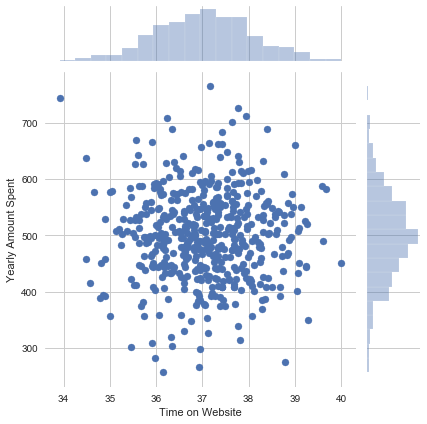

In [6]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',
              y='Yearly Amount Spent',
              data=customers)

** Do the same but with the Time on App column instead. **

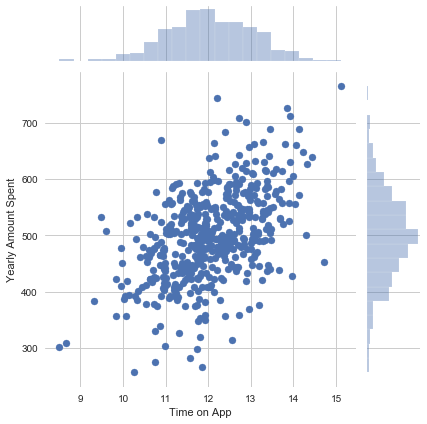

In [7]:
sns.jointplot(x='Time on App',
              y='Yearly Amount Spent',
              data=customers)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

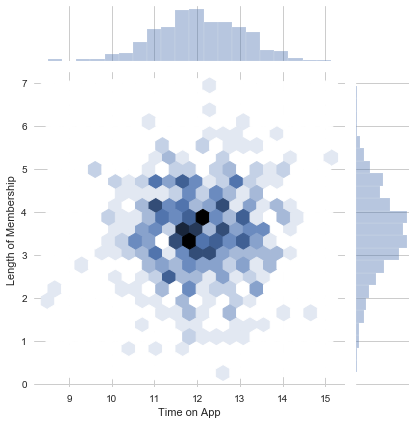

In [8]:
sns.jointplot(x='Time on App',
              y='Length of Membership',
              kind='hex',
              data=customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

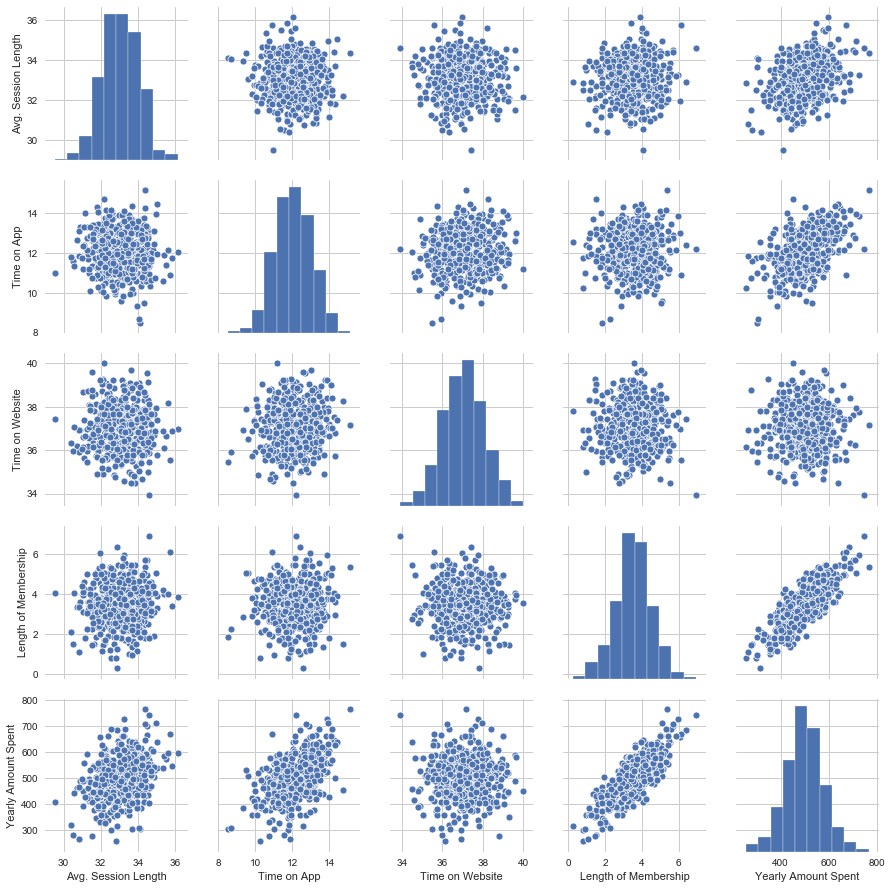

In [9]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [10]:
# Length of Membership 

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

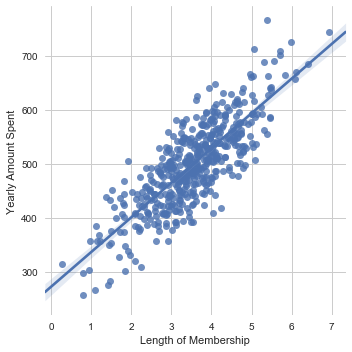

In [11]:
sns.lmplot(x='Length of Membership',
           y='Yearly Amount Spent',
           data=customers)

Calculate the Pearson Coefficient for each pair of features.<br>
`customers.corr()['Yearly Amount Spent'].sort_values(ascending=False)`

In [12]:
customers.corr()['Yearly Amount Spent'].sort_values(ascending=False)

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64

**This is a value from -1 to 1 and indicates HOW MUCH linear correlation it is present between 2 features**
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [13]:
y = customers['Yearly Amount Spent']

In [14]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 
# 30 % of data is for testing 
#random_state is the seed 


## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [17]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [18]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [33]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [29]:
# The coefficients
print('Coefficients: \n', lm.coef_)
list(zip(X_train.columns, lm.coef_)) # the line lm.coef_is for the zip necessary

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


[('Avg. Session Length', 25.98154972349578),
 ('Time on App', 38.590158753114096),
 ('Time on Website', 0.19040527751100886),
 ('Length of Membership', 61.27909654482184)]

## Let's do a 10-fold Cross validation on data to see the performances of each fold

In [34]:
from sklearn.model_selection import cross_validate

In [35]:
scores = cross_validate(LinearRegression(), X_train, y_train, cv=10)

In [36]:
pd.DataFrame(scores) # test_score = R^2 (how well the model describes the datasets)

,fit_time,score_time,test_score
0,0.003008,0.002006,0.961689
1,0.003007,0.001003,0.978174
2,0.002005,0.002006,0.977809
3,0.003009,0.002005,0.988001
4,0.003007,0.003010,0.985248
5,0.002007,0.003005,0.981047
6,0.004012,0.001004,0.981244
7,0.002004,0.001003,0.975860
8,0.003007,0.002005,0.981583
9,0.002005,0.002005,0.970371


In [37]:
pd.DataFrame(scores).mean(axis=0)

fit_time      0.002707
score_time    0.001905
test_score    0.978102
dtype: float64

## FORCE overfitting: provide a very flexible model

In [38]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=10)
X_train_poly = p.fit_transform(X_train)

In [39]:
scores = cross_validate(LinearRegression(), X_train_poly, y_train, cv=5, return_train_score=True)

In [40]:
scores

{'fit_time': array([0.08823538, 0.07921219, 0.07720542, 0.07921028, 0.08021379]),
 'score_time': array([0.00100017, 0.0010016 , 0.00100255, 0.00100327, 0.00100207]),
 'test_score': array([ -45292.30768839,  -20000.61770712, -222304.13809205,
          -2502.54473648, -461872.68430773]),
 'train_score': array([0.99867719, 0.99990142, 0.99993184, 0.99990455, 0.99985733])}

The scores are probably VERY BAD! Why? Because the model is clearly linear, and we are providing a super flexible model. On the training set works super well, on unseen data (validation sets) NO!

Suppose <span style="color:red;">you don't know</span> the best degree of the data. You don't know which degree of model is good for your data. You have to choose it with a GridSearch

In [41]:
# GRID SEARCH!
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(LinearRegression(), param_grid={'degree': range(1, 50)})

Mmmmmm Errors? Ops, Sklearn is right! The LinearRegression() does not have a "degree" parameter. We need instead to set the degree, transform the data, and THEN use a Linear Regressor!<br>
We need to use a Pipeline...

In [42]:
from sklearn.pipeline import Pipeline
p = Pipeline([('poly', PolynomialFeatures()),
              ('lin_reg', LinearRegression())])
grid = GridSearchCV(p, param_grid={'poly__degree': range(1, 20)}, cv=5)

In [43]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('lin_reg',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None, param_grid={'poly__degree': range(1, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

(0, 1)

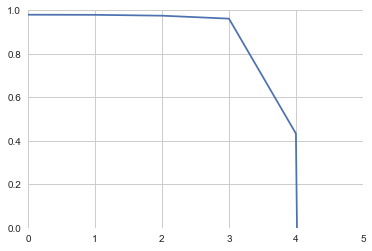

In [57]:
grid_scores = pd.DataFrame(grid.cv_results_)[['param_poly__degree', 'params', 'rank_test_score', 'mean_test_score']]
grid_scores
plt.plot(grid_scores['mean_test_score'])
plt.xlim([0,5])
plt.ylim([0,1])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [59]:
predictions = grid.predict(X_test) #grid stands here for the model predict the new data

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

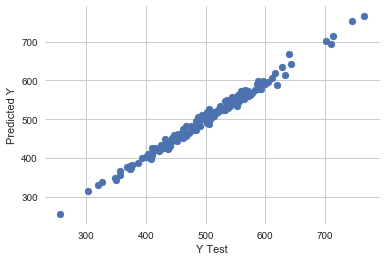

In [60]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [62]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('R2:', metrics.r2_score(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.2281486534308685
R2: 0.9890046246741233
MSE: 79.8130516509751
RMSE: 8.93381506697867


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

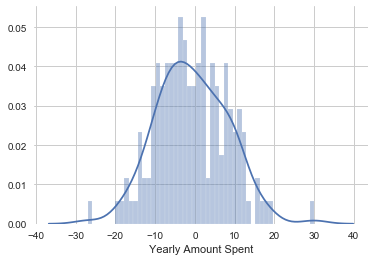

In [94]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [63]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coefficient']
coeffecients

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!


## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.